In [164]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cross_validation as cv

# Extra functionality
import visplots

from sklearn import preprocessing, metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from scipy.stats.distributions import randint
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import cluster

from multilayer_perceptron import multilayer_perceptron

%matplotlib inline

In [41]:
input_path = '/home/ak/Dropbox/Research/Andreas K Gareth P Shared Research Folder/Code & Data/'
name_1 ='FX Spot and Forwards for GRAI Index'
name_2='10 yrs 48 Asset Data with Labels'
input_file_1=pd.read_csv(input_path+name_2+'.csv')
macro_data=input_file_1.dropna(how='any')

In [226]:
split_idx = int(len(macro_data.index)/2)
data_train =macro_data.iloc[:split_idx,13:20].values
data_test =macro_data.iloc[split_idx:,13:20].values

In [227]:
np.shape(data_test)

(969, 7)

In [228]:
scale_data_train = scale(data_train)
scale_data_test = scale(data_test)


In [229]:
n_samples, n_features = np.shape(scale_data_train)

In [230]:
clf.fit(scale_data_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [231]:
pca = PCA(n_components =2)

In [232]:
reduced_data_train =pca.fit_transform(scale_data_train)
reduced_data_test =pca.transform(scale_data_test)

In [233]:
clf =cluster.KMeans(init='k-means++',n_clusters=5, random_state=42)

In [234]:
clf.fit(reduced_data_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [235]:
Y_pred = clf.predict(reduced_data_test)

In [236]:
print Y_pred

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 2 2 2 2 2 2 2 2 2
 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 2 3 3 3 3 3
 3 3 3 3 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [237]:
h = 0.02
#plotting decision boundary
x_min, x_max = reduced_data_test[:,0].min()-2, reduced_data_test[:,0].max()+2
y_min, y_max = reduced_data_test[:,1].min()-2, reduced_data_test[:,1].max()+2

In [238]:
xx,yy =np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min, y_max, h))

In [239]:
#obtain labels for each point in mesh, based on trained model
centers =clf.cluster_centers_

In [240]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

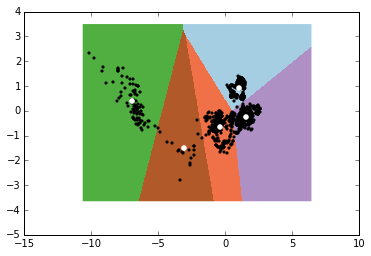

In [241]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.show()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(),xx.max(), yy.min(), yy.max()), 
           cmap=plt.cm.Paired,
           aspect ='auto', origin ='lower')
plt.plot(reduced_data_train[:,0], reduced_data_train[:,1], 'k.', markersize =5)
plt.scatter(centers[:,0], centers[:,1], color='w', zorder=10)

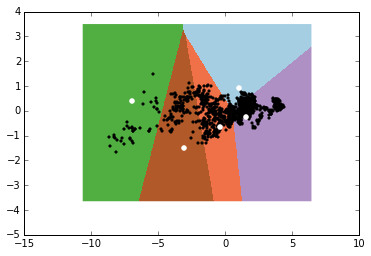

In [242]:
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.show()
plt.imshow(Z, interpolation='nearest', extent=(xx.min(),xx.max(), yy.min(), yy.max()), 
           cmap=plt.cm.Paired,
           aspect ='auto', origin ='lower')
plt.plot(reduced_data_test[:,0], reduced_data_test[:,1], 'k.', markersize =5)
plt.scatter(centers[:,0], centers[:,1], color='w', zorder=10)